In [3]:
# Import necessary libraries
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, concatenate
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Set the path for the dataset
dataset_path = '/content/drive/MyDrive/CS552J_DMDL_Assessment_1_Dataset/DMV_Assess_1_Covid-19_Dataset'

In [5]:
# Define image dimensions and batch size
img_height, img_width = 256, 256
batch_size = 32

In [6]:
# Without a Data augmentation generator for training data
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2
)
# Set up data generators with data augmentation
train_data_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split = 0.2
)


In [7]:
# Split data into train and test sets
train_generator = train_data_gen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    subset='training',
    shuffle=True
)

test_generator = train_data_gen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    subset='validation',
    shuffle=False
)
# Set up data generators with data augmentation
train_generator_aug = train_data_gen_aug.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    subset='training',
    shuffle=True
)

test_generator_aug = train_data_gen_aug.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [8]:
#CNN model with data argumentation

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model 
history_1 = cnn_model.fit(
    train_generator_aug ,
    epochs=50,
    validation_data=test_generator_aug
)


Epoch 1/50
5/5 [==============================] - 38s 5s/step - loss: 1.2423 - accuracy: 0.4250 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 0.6927 - accuracy: 0.5312 - val_loss: 0.6587 - val_accuracy: 0.7250
Epoch 3/50
5/5 [==============================] - 8s 2s/step - loss: 0.6495 - accuracy: 0.6812 - val_loss: 0.5603 - val_accuracy: 0.9000
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 0.5490 - accuracy: 0.6500 - val_loss: 0.4460 - val_accuracy: 0.8500
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 0.3595 - accuracy: 0.8375 - val_loss: 0.3432 - val_accuracy: 0.8750
Epoch 6/50
5/5 [==============================] - 8s 2s/step - loss: 0.3077 - accuracy: 0.8813 - val_loss: 0.3294 - val_accuracy: 0.8750
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 0.2709 - accuracy: 0.9000 - val_loss: 0.1821 - val_accuracy: 0.9500
Epoch 8/50
5/5 [========================

In [9]:
# Evaluate the CNN model on the test data
test_loss, test_accuracy = cnn_model.evaluate(test_generator_aug)

# Evaluate the CNN model on the train data
train_loss, train_accuracy = cnn_model.evaluate(train_generator_aug)


5/5 [==============================] - 7s 1s/step - loss: 0.1221 - accuracy: 0.9625


In [14]:
#FNN model with data argumentation

# Define the FNN model
fnn_model = Sequential()
fnn_model.add(Flatten(input_shape=(img_height, img_width, 3)))
fnn_model.add(Dense(256, activation='relu'))
fnn_model.add(Dense(128, activation='relu'))
fnn_model.add(Dense(64, activation='relu'))
fnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_2 = fnn_model.fit(
    train_generator_aug,
    epochs=50,
    validation_data=test_generator_aug
)



Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 20.6173 - accuracy: 0.4500 - val_loss: 5.7848 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 17.3831 - accuracy: 0.4938 - val_loss: 18.7816 - val_accuracy: 0.5000
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 10.9640 - accuracy: 0.5938 - val_loss: 14.5857 - val_accuracy: 0.5000
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 9.8572 - accuracy: 0.5875 - val_loss: 3.3513 - val_accuracy: 0.7500
Epoch 5/50
5/5 [==============================] - 8s 2s/step - loss: 3.4877 - accuracy: 0.7625 - val_loss: 1.7462 - val_accuracy: 0.9250
Epoch 6/50
5/5 [==============================] - 9s 2s/step - loss: 2.9837 - accuracy: 0.8375 - val_loss: 3.4910 - val_accuracy: 0.8250
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 3.1834 - accuracy: 0.8500 - val_loss: 2.5455 - val_accuracy: 0.8500
Epoch 8/50
5/5 [===================

In [22]:
# Evaluate the FNN model on the test data
test_loss, test_accuracy = fnn_model.evaluate(test_generator_aug)

# Evaluate the FNN model on the train data
train_loss, train_accuracy = fnn_model.evaluate(train_generator_aug)


5/5 [==============================] - 6s 1s/step - loss: 0.6161 - accuracy: 0.9125


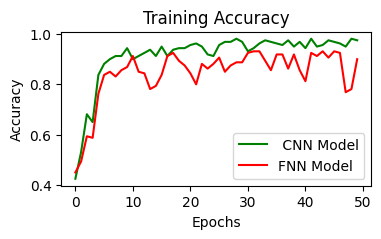

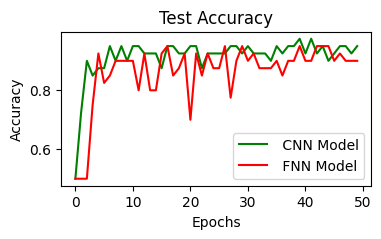

In [35]:
#ploting graph for CNN model and FNN model
# Plot the training accuracy
plt.figure(figsize=(4, 2))
plt.plot(history_1.history['accuracy'], color='green', label=' CNN Model')
plt.plot(history_2.history['accuracy'], color='red', label='FNN Model')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the test accuracy
plt.figure(figsize=(4, 2))
plt.plot(history_1.history['val_accuracy'], color='green', label=' CNN Model')
plt.plot(history_2.history['val_accuracy'], color='red', label=' FNN Model')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


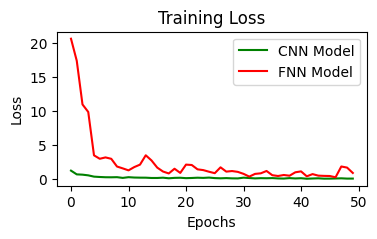

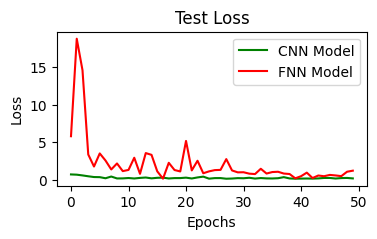

In [36]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.figure(figsize=(4, 2))
plt.plot(history_1.history['loss'], color='green', label='CNN Model')
plt.plot(history_2.history['loss'], color='red', label='FNN Model')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the test loss
plt.figure(figsize=(4, 2))
plt.plot(history_1.history['val_loss'], color='green', label='CNN Model')
plt.plot(history_2.history['val_loss'], color='red', label='FNN Model')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [23]:
# CNN model with early stop and weight decay (L2 regularization)

# Create a CNN model 
cnn_model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), kernel_regularizer=regularizers.l2(1e-4)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnn_model_1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to the CNN model
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

# Train the CNN model 
history_3 = cnn_model_1.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
5/5 [==============================] - 12s 2s/step - loss: 0.7662 - accuracy: 0.5875 - val_loss: 0.5887 - val_accuracy: 0.9500
Epoch 2/50
5/5 [==============================] - 5s 1s/step - loss: 0.5154 - accuracy: 0.8250 - val_loss: 0.2836 - val_accuracy: 0.8500
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 0.2530 - accuracy: 0.9312 - val_loss: 0.1928 - val_accuracy: 0.9750
Epoch 4/50
5/5 [==============================] - 6s 1s/step - loss: 0.1249 - accuracy: 0.9563 - val_loss: 0.2462 - val_accuracy: 0.9750
Epoch 5/50
5/5 [==============================] - 5s 1s/step - loss: 0.1777 - accuracy: 0.9688 - val_loss: 0.2599 - val_accuracy: 0.9750
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 0.1378 - accuracy: 0.9688 - val_loss: 0.2957 - val_accuracy: 0.9500
Epoch 7/50
5/5 [==============================] - 5s 1s/step - loss: 0.1233 - accuracy: 0.9812 - val_loss: 0.2442 - val_accuracy: 0.9750
Epoch 8/50
5/5 [========================

In [24]:
# Evaluate the CNN model 1 on the test data
test_loss, test_accuracy = cnn_model_1.evaluate(test_generator)

# Evaluate the CNN model 1 on the train data
train_loss, train_accuracy = cnn_model_1.evaluate(train_generator)


5/5 [==============================] - 5s 1s/step - loss: 0.0602 - accuracy: 0.9875


In [25]:
# CNN model with ensembles
# Create the input layer
input_layer = Input(shape=(img_height, img_width, 3))

# Define the first CNN model
cnn_model_01 = Conv2D(128, (3, 3), activation='relu')(input_layer)
cnn_model_01 = MaxPooling2D((2, 2))(cnn_model_01)
cnn_model_01 = Conv2D(256, (3, 3), activation='relu')(cnn_model_01)
cnn_model_01 = MaxPooling2D((2, 2))(cnn_model_01)
cnn_model_01 = Conv2D(512, (3, 3), activation='relu')(cnn_model_01)
cnn_model_01 = MaxPooling2D((2, 2))(cnn_model_01)
cnn_model_01 = Conv2D(512, (3, 3), activation='relu')(cnn_model_01)
cnn_model_01 = MaxPooling2D((2, 2))(cnn_model_01)
cnn_model_01 = Flatten()(cnn_model_01)
cnn_model_01 = Dense(256, activation='relu')(cnn_model_01)
output_layer_1 = Dense(1, activation='sigmoid')(cnn_model_01)

# Define the second CNN model
cnn_model_02 = Conv2D(128, (3, 3), activation='relu')(input_layer)
cnn_model_02 = MaxPooling2D((2, 2))(cnn_model_02)
cnn_model_02 = Conv2D(256, (3, 3), activation='relu')(cnn_model_02)
cnn_model_02 = MaxPooling2D((2, 2))(cnn_model_02)
cnn_model_02 = Conv2D(512, (3, 3), activation='relu')(cnn_model_02)
cnn_model_02 = MaxPooling2D((2, 2))(cnn_model_02)
cnn_model_02 = Conv2D(512, (3, 3), activation='relu')(cnn_model_02)
cnn_model_02 = MaxPooling2D((2, 2))(cnn_model_02)
cnn_model_02 = Flatten()(cnn_model_02)
cnn_model_02 = Dense(256, activation='relu')(cnn_model_02)
output_layer_2 = Dense(1, activation='sigmoid')(cnn_model_02)

# Add additional layers
ensemble_model = concatenate([cnn_model_01, cnn_model_02])
ensemble_model = Dense(128, activation='relu')(ensemble_model)
ensemble_model = Dense(64, activation='relu')(ensemble_model)
output_layer = Dense(1, activation='sigmoid')(ensemble_model)

# Create the ensemble model
ensemble_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the CNN model
ensemble_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model using the ensemble
history_4 = ensemble_model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
)

Epoch 1/50
5/5 [==============================] - 24s 2s/step - loss: 1.6266 - accuracy: 0.5625 - val_loss: 0.7300 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 0.7116 - accuracy: 0.4375 - val_loss: 0.6844 - val_accuracy: 0.9000
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 0.6822 - accuracy: 0.6500 - val_loss: 0.6175 - val_accuracy: 0.7250
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 0.5057 - accuracy: 0.7375 - val_loss: 0.2532 - val_accuracy: 0.9500
Epoch 5/50
5/5 [==============================] - 8s 2s/step - loss: 0.4803 - accuracy: 0.8375 - val_loss: 0.6047 - val_accuracy: 0.7000
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 0.3292 - accuracy: 0.8813 - val_loss: 0.3122 - val_accuracy: 0.9000
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: 0.1740 - accuracy: 0.9500 - val_loss: 0.4467 - val_accuracy: 0.8750
Epoch 8/50
5/5 [========================

In [33]:
# Evaluate the ensemble model on the test data
test_loss, test_accuracy = ensemble_model.evaluate(test_generator)

# Evaluate the ensemble model on the train data
train_loss, train_accuracy = ensemble_model.evaluate(train_generator)


5/5 [==============================] - 5s 841ms/step - loss: 0.0036 - accuracy: 1.0000


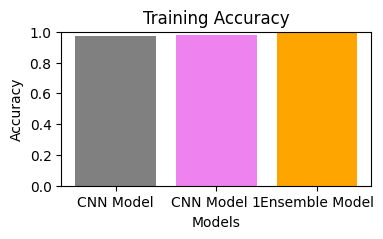

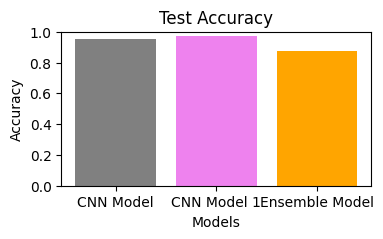

In [34]:
#plotting the test and train accuracy for all the CNN model
import numpy as np
import matplotlib.pyplot as plt

train_accuracy = [history_1.history['accuracy'][-1],
                  history_3.history['accuracy'][-1],
                  history_4.history['accuracy'][-1]]
models = ['CNN Model', 'CNN Model 1', 'Ensemble Model']
x_pos = np.arange(len(models))

colors = ['grey', 'violet', 'orange']

plt.figure(figsize=(4, 2))
plt.bar(x_pos, train_accuracy, align='center', color=colors)
plt.xticks(x_pos, models)
plt.title('Training Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

test_accuracy = [history_1.history['val_accuracy'][-1],
                 history_3.history['val_accuracy'][-1],
                 history_4.history['val_accuracy'][-1]]

plt.figure(figsize=(4, 2))
plt.bar(x_pos, test_accuracy, align='center', color=colors)
plt.xticks(x_pos, models)
plt.title('Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()



In [34]:
# Load the pre-trained ResNet-50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Remove the last fully connected layer
x = base_model.layers[-2].output

# Add two new trainable layers for binary classification
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the transfer learning model
tl_model = Model(inputs=base_model.input, outputs=predictions)


# Define the learning rate
learning_rate = 0.001

# Compile the model with Adam optimizer and learning rate
optimizer = Adam(learning_rate=learning_rate)
tl_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
tl_model.fit(train_generator,
             steps_per_epoch=train_generator.samples // batch_size,
             epochs=50,
             validation_data=test_generator,
             validation_steps=test_generator.samples // batch_size)


94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/50
5/5 [==============================] - 13s 1s/step - loss: 6.0645 - accuracy: 0.5250 - val_loss: 1.3627 - val_accuracy: 0.6250
Epoch 2/50
5/5 [==============================] - 7s 1s/step - loss: 1.5303 - accuracy: 0.5000 - val_loss: 0.6760 - val_accuracy: 0.7812
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 1.1535 - accuracy: 0.5375 - val_loss: 1.2572 - val_accuracy: 0.3750
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 0.7711 - accuracy: 0.5625 - val_loss: 0.7786 - val_accuracy: 0.6250
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 0.8704 - accuracy: 0.5000 - val_loss: 0.7046 - val_accuracy: 0.3750
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 0.7272 - accuracy: 0.5000 - val_loss: 0.7611 - val_accuracy: 0.3750
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 0.6681 - accuracy: 0.5938 - val_loss: 0.635

In [37]:
# Evaluate the Transfer learning model on the test data
test_loss, test_accuracy = tl_model.evaluate(test_generator)

# Evaluate the Transfer learning model on the train data
train_loss, train_accuracy = tl_model.evaluate(train_generator)

5/5 [==============================] - 5s 862ms/step - loss: 0.4228 - accuracy: 0.9187
